In [44]:
'''from google.colab import files
files=files.upload()'''

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("datasets/Mall_Customers.csv")

In [49]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [52]:
# checking for NULL data in the dataset
df.isnull().any().any()

False

In [53]:
df.drop(['CustomerID','Genre'],axis=1,inplace=True)

## Medir bien las distancias

Como tenemos datos numéricos y categóricos hay que crear un métodod de distancia de Gower para ajustar bien.

In [ ]:
def gower_distance(x, y):
    # Inicializar la distancia
    distance = 0
    
    # Calcular la distancia de Manhattan para variables numéricas
    for i in range(len(x)):
        if np.issubdtype(type(x[i]), np.number) and np.issubdtype(type(y[i]), np.number):
            distance += abs(x[i] - y[i])
        elif x[i] != y[i]:  # Calcular la distancia de Hamming para variables categóricas
            distance += 1
    
    return distance

In [54]:
stscaler = StandardScaler().fit(df)
X = stscaler.transform(df)

In [55]:
from sklearn.neighbors import NearestNeighbors
# Encontrar las distancias k
k = 8
neighbors = NearestNeighbors(n_neighbors=k, metric='minkowski')
neighbors_fit = neighbors.fit(X)
distances, _ = neighbors_fit.kneighbors(X)

In [56]:
# Ordenar las distancias
distances_sorted = np.sort(distances, axis=0)
distances_mean = distances_sorted.mean(axis=1)

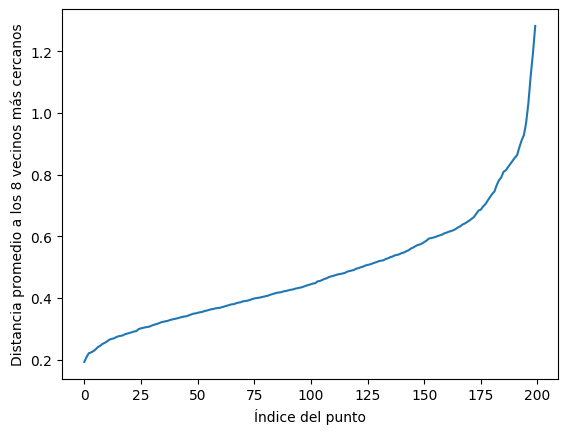

In [57]:
# Graficar las distancias k
plt.plot(distances_mean)
plt.xlabel('Índice del punto')
plt.ylabel(f'Distancia promedio a los {k} vecinos más cercanos')
plt.show()

In [79]:
dbscan = DBSCAN(eps=0.6, min_samples=7)
dbscan.fit(X)

DBSCAN(eps=0.6, min_samples=7)

In [80]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, dbscan.labels_))

Silhouette Coefficient: 0.211


In [81]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  1,  2,  1,  0,  1,  2,  2,  2,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  2,
        1,  1,  2, -1,  1,  1,  2,  1,  1,  1,  2,  1,  2,  1,  2,  2,  1,
        1,  2,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  1,  1,  1,
        1,  2,  1, -1, -1, -1,  3, -1,  3, -1,  3,  4,  3, -1,  3, -1,  3,
        4,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,  4,  3,  4,
        3,  4,  3, -1,  3, -1,  3, -1,  3, -1,  3,  4,  3,  4,  3,  4,  3,
        4,  3,  4,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
       -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [82]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [83]:
cl.value_counts()

cluster
-1         61
 1         51
 3         32
 2         27
 0         19
 4         10
dtype: int64

In [84]:
df_final = pd.concat([df,cl],axis=1)

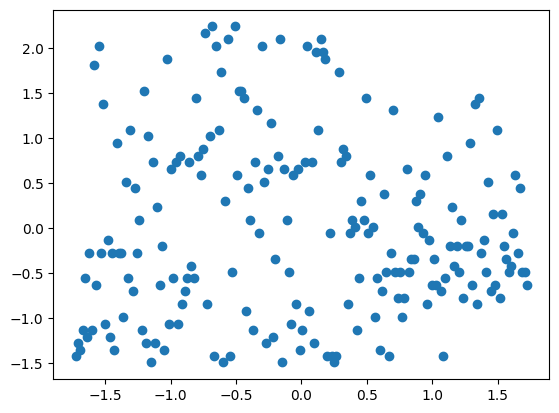

In [85]:
plt.scatter(X[:,0], X[:,1])

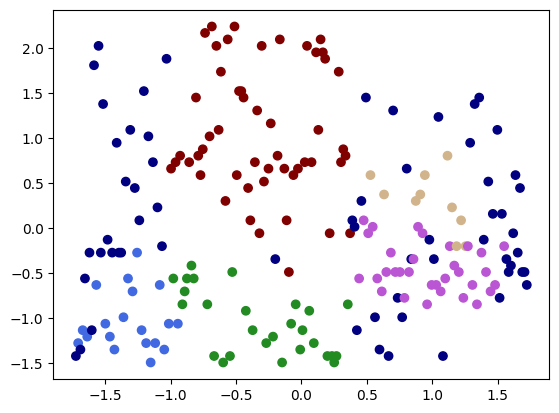

In [86]:
from matplotlib import pyplot as plt
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(dbscan.labels_))

In [87]:
df_final.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,-1
1,2,21,15,81,0
2,3,20,16,6,-1
3,4,23,16,77,0
4,5,31,17,40,-1


In [94]:
df_final0 = df_final[df_final['cluster']==0]
df_final1 = df_final[df_final['cluster']==1]
df_final2 = df_final[df_final['cluster']==2]
df_final3 = df_final[df_final['cluster']==3]
df_final4 = df_final[df_final['cluster']==4]

In [95]:
df_final0.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
1,2,21,15,81,0
3,4,23,16,77,0
5,6,22,17,76,0
9,10,30,19,72,0
13,14,24,20,77,0


In [96]:
df_final1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
42,43,48,39,36,1
44,45,49,39,28,1
46,47,50,40,55,1
50,51,49,42,52,1
53,54,59,43,60,1


In [97]:
df_final2.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,27.000000,27.000000,27.000000,27.000000,27.0
mean,82.407407,24.074074,53.666667,51.074074,2.0
std,24.825947,4.937501,9.302605,6.082294,0.0
min,44.000000,18.000000,39.000000,41.000000,2.0
25%,60.500000,19.000000,46.000000,47.000000,2.0
50%,85.000000,23.000000,54.000000,52.000000,2.0
75%,102.500000,27.000000,62.000000,55.000000,2.0
max,121.000000,33.000000,67.000000,61.000000,2.0


In [98]:
df_final3.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,32.000000,32.000000,32.000000,32.00000,32.0
mean,157.062500,32.531250,81.437500,82.75000,3.0
std,18.871274,3.698163,9.101356,9.35673,0.0
min,126.000000,27.000000,70.000000,63.00000,3.0
25%,141.500000,30.000000,74.750000,75.00000,3.0
50%,157.000000,32.000000,78.000000,85.50000,3.0
75%,172.500000,35.250000,87.000000,90.00000,3.0
max,190.000000,40.000000,103.000000,97.00000,3.0


In [99]:
df_final4.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,10.000000,10.000000,10.000000,10.000000,10.0
mean,157.200000,42.900000,81.000000,16.500000,4.0
std,14.497509,4.605552,6.146363,6.883959,0.0
min,131.000000,36.000000,71.000000,7.000000,4.0
25%,151.500000,40.500000,78.000000,10.750000,4.0
50%,160.000000,43.500000,81.500000,16.500000,4.0
75%,168.500000,46.250000,86.750000,20.000000,4.0
max,173.000000,50.000000,87.000000,27.000000,4.0
